### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент: Алламе Ормиз
##### Группа:НФИбд-01-21

## Москва 2024
***

### Вариант № 9

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

In [1]:
from sklearn.metrics.cluster import contingency_matrix
from urllib.request import urlopen
import matplotlib.pyplot as plt
from contextlib import closing
import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings("ignore")

In [2]:
f1 = 1
f2 = 2
target = 0
df = pd.read_csv("../data/abalone.data",
                 delimiter=",", header=None, on_bad_lines='skip')
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df=df[[f1,f2,target]]

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.


In [4]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 4177
Число признаков = 3
Число пропущенных значений:
	1: 0
	2: 0
	0: 0


In [5]:
df.dropna(subset=[target], inplace=True)
df[[f1, f2]] = df.groupby(target)[[f1, f2]].transform(lambda x: x.fillna(x.median()))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число пропущенных значений:
	1: 0
	2: 0
	0: 0


3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 

In [6]:
df[target].value_counts()

M    1528
I    1342
F    1307
Name: 0, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[target].value_counts()

2    1528
1    1342
0    1307
Name: 0, dtype: int64

In [8]:
unique_classes = df[target].value_counts()

if len(unique_classes) > 5:
    sorted_classes = unique_classes.index[::-1]
    
    for i in range(len(sorted_classes) - 1, 6, -1):
        df[target] = df[target].replace(sorted_classes[i], sorted_classes[i - 1])

df[target].value_counts()

2    1528
1    1342
0    1307
Name: 0, dtype: int64

In [9]:
lens = df[target].value_counts().shape[0]

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [10]:
X = df[[f1,f2]].astype(float)
y = df[target].astype(int)

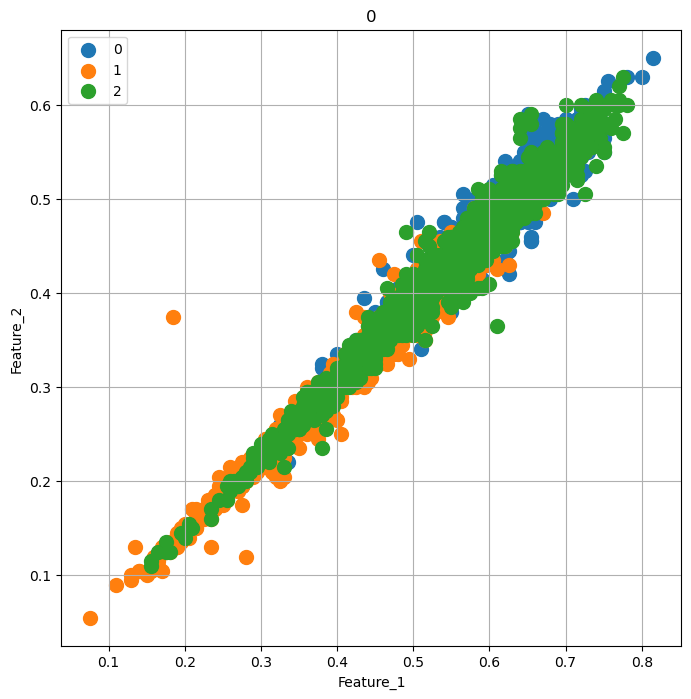

In [11]:
def plot_cluster(X,y):
    plt.figure(figsize=(8,8))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100, label = cluster)
    plt.title(target)
    plt.xlabel('Feature_1') 
    plt.ylabel('Feature_2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_cluster(X.values,y)

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

In [12]:
# df = df.sample(1000)

X = df[[f1,f2]].astype(float)
y = df[target].astype(int)

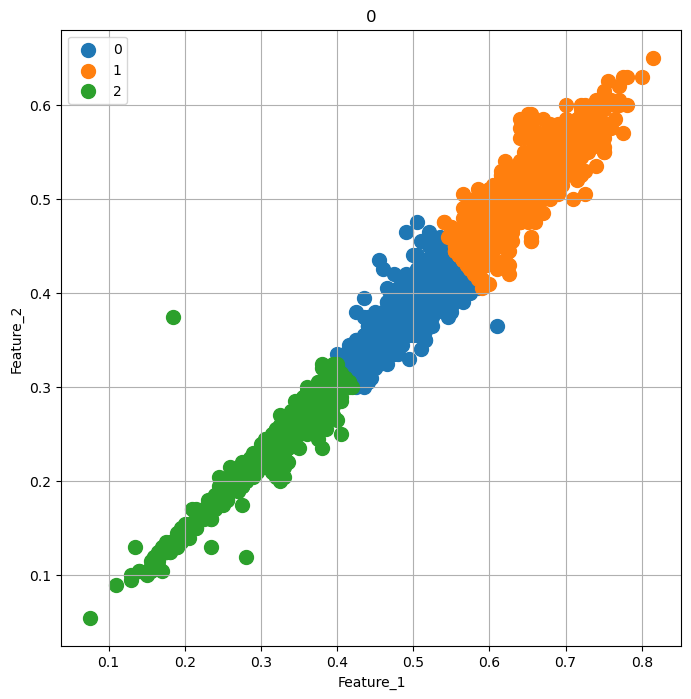

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=lens)
model.fit(X)
yhat1 = model.predict(X)
plot_cluster(X.values,yhat1)

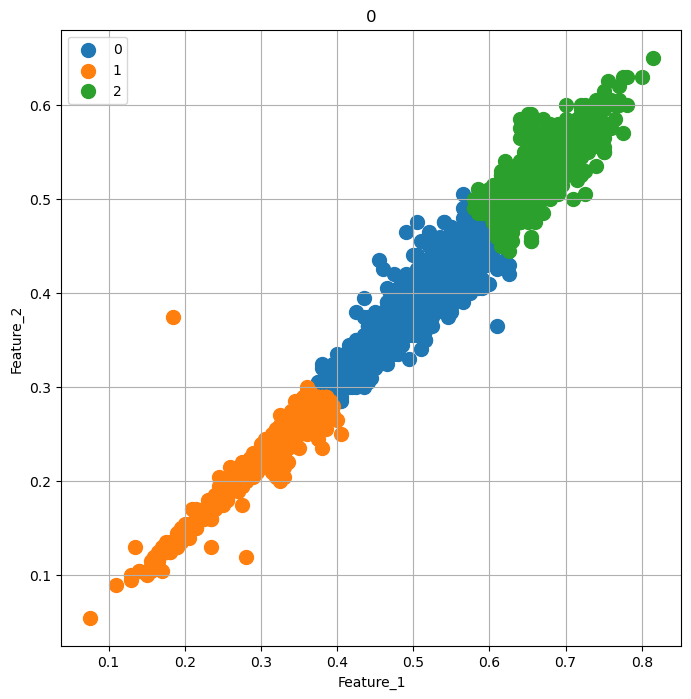

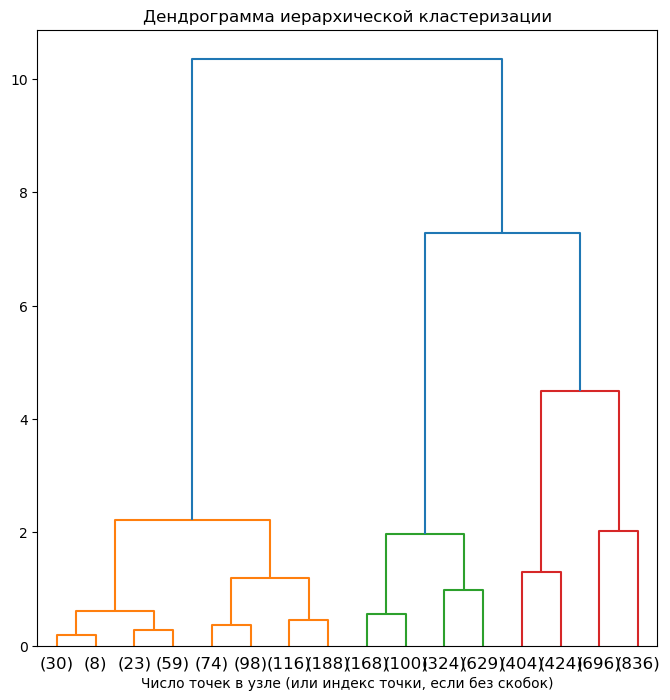

In [14]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=lens)
yhat2 = model.fit_predict(X)
plot_cluster(X.values,yhat2)

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.figure(figsize=(8,8))
plt.title("Дендрограмма иерархической кластеризации")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Число точек в узле (или индекс точки, если без скобок)");

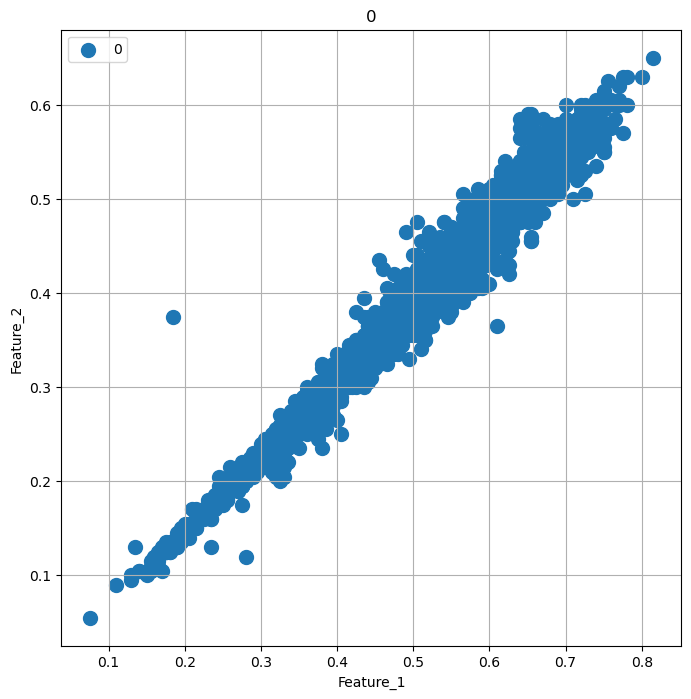

In [15]:
from sklearn.cluster import DBSCAN
model = DBSCAN(min_samples=10)
yhat3 = model.fit_predict(X)
plot_cluster(X.values,yhat3)

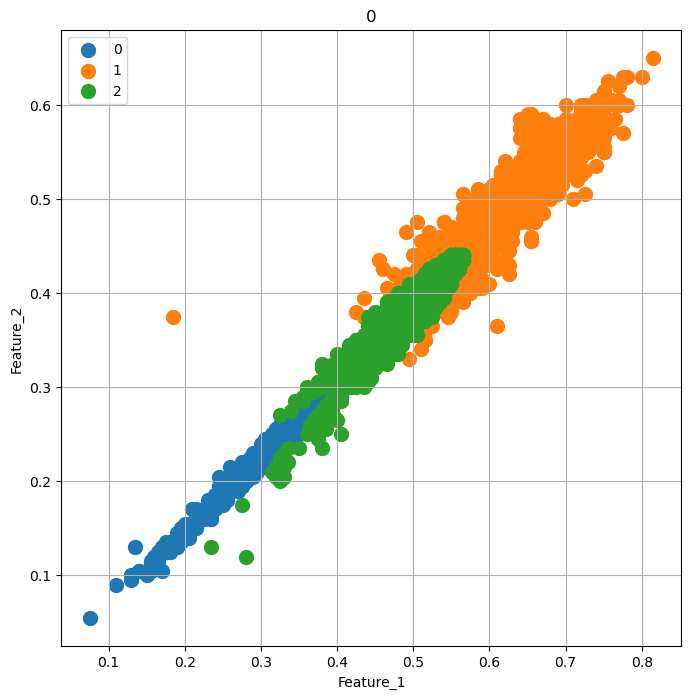

In [16]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=lens)
model.fit(X)
yhat4 = model.predict(X)
plot_cluster(X.values,yhat4)

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  


In [17]:
print ('\n', contingency_matrix(y, yhat1))
print ('\n', contingency_matrix(y, yhat2))
print ('\n', contingency_matrix(y, yhat3))
print ('\n', contingency_matrix(y, yhat4))


 [[416 838  53]
 [657 136 549]
 [499 895 134]]

 [[703  27 577]
 [834 460  48]
 [823 109 596]]

 [[1307]
 [1342]
 [1528]]

 [[ 35 878 394]
 [456 164 722]
 [105 950 473]]


In [18]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
    return(TP, FP, TN, FN)
print (perf_measure(y, yhat1))
print (perf_measure(y, yhat2))
print (perf_measure(y, yhat3))
print (perf_measure(y, yhat4))

(136, 1733, 416, 1156)
(460, 136, 703, 1657)
(0, 0, 1307, 2870)
(164, 1828, 35, 561)


In [19]:
from sklearn.metrics.cluster import rand_score
print (rand_score(y, yhat1))
print (rand_score(y, yhat2))
print (rand_score(y, yhat3))
print (rand_score(y, yhat4))

0.6012897210320703
0.5587868522844953
0.3347915560215264
0.5957858992457327


In [20]:
import numpy as np
from scipy.stats import entropy

def conditional_entropy(clustering, ground_truth):
    unique_clusters = np.unique(clustering)
    unique_labels = np.unique(ground_truth)
    
    cond_entropy = 0.0
    
    for cluster in unique_clusters:
        cluster_indices = np.where(clustering == cluster)[0]
        cluster_labels = ground_truth[cluster_indices]
        cluster_count = len(cluster_labels)
        
        for label in unique_labels:
            label_count = np.sum(cluster_labels == label)
            
            if label_count > 0:
                p_cluster_given_label = label_count / cluster_count
                cond_entropy -= p_cluster_given_label * np.log2(p_cluster_given_label)
    
    return cond_entropy

print(conditional_entropy(y, yhat1))
print(conditional_entropy(y, yhat2))
print(conditional_entropy(y, yhat3))
print(conditional_entropy(y, yhat4))

3.7782103600846964
3.527768640305876
0.0
3.643276613219989


7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

In [21]:
metric = conditional_entropy

print (metric(y, yhat1))
print (metric(y, yhat2))
print (metric(y, yhat3))
print (metric(y, yhat4))

3.7782103600846964
3.527768640305876
0.0
3.643276613219989


In [22]:
best = 'DBSCAN'

print ("Алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании - ", best)

Алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании -  DBSCAN


8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

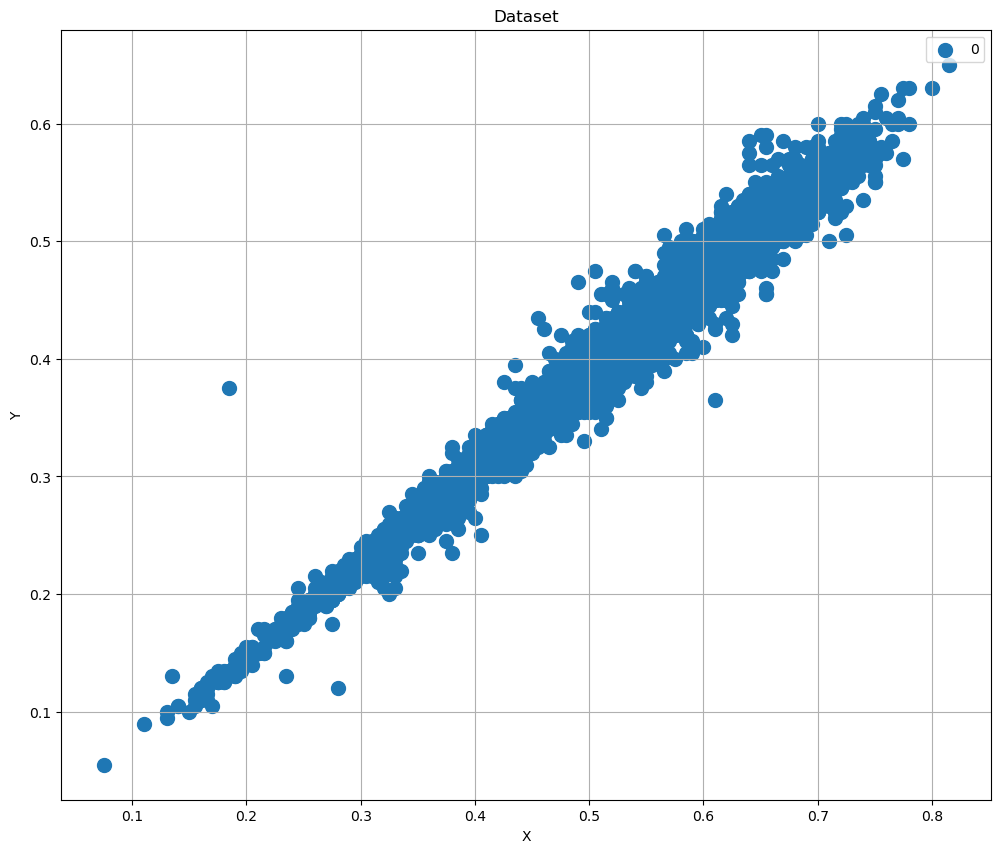

In [23]:
def plot_cluster(X,y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100, label = cluster)
    plt.title('Dataset')
    plt.xlabel('X') 
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_cluster(X.values,yhat3)